In [1]:
import numpy as np
import zipfile
import matplotlib.pyplot as plt 
%matplotlib inline

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/PyTorch_Vol3/03-Data-Formats.zip"
zip_file = zipfile.ZipFile(file = path , mode = "r")
zip_file.extractall()
zip_file.close()

In [3]:
%%capture
!pip install pydicom

from pathlib import Path
import pydicom

In [4]:
sample_dcm = "/content/03-Data-Formats/ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(sample_dcm)
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [5]:
print(dicom_file[0x0028,0x0010])
print(dicom_file[0x0028,0x0011])
print(dicom_file[0x0018,0x0015])

(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0018, 0015) Body Part Examined                  CS: 'CHEST'


In [6]:
print("Rows : ", dicom_file.Rows)
print("Columns : ",dicom_file.Columns)
print("Body Part Examined : ", dicom_file.BodyPartExamined)

Rows :  512
Columns :  512
Body Part Examined :  CHEST


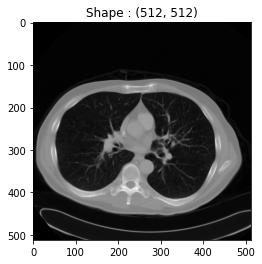

In [7]:
ct = dicom_file.pixel_array

plt.figure()
plt.imshow(ct, cmap = "gray")
plt.title(f"Shape : {ct.shape}")
plt.show()

# 3D Data

In [8]:
path_to_head_mri = Path("/content/03-Data-Formats/SE000001")
all_files = list(path_to_head_mri.glob("*"))
len(all_files)

27

In [9]:
print(all_files)

[PosixPath('/content/03-Data-Formats/SE000001/MR000001'), PosixPath('/content/03-Data-Formats/SE000001/MR000023'), PosixPath('/content/03-Data-Formats/SE000001/MR000008'), PosixPath('/content/03-Data-Formats/SE000001/MR000013'), PosixPath('/content/03-Data-Formats/SE000001/MR000018'), PosixPath('/content/03-Data-Formats/SE000001/MR000019'), PosixPath('/content/03-Data-Formats/SE000001/MR000010'), PosixPath('/content/03-Data-Formats/SE000001/MR000004'), PosixPath('/content/03-Data-Formats/SE000001/MR000000'), PosixPath('/content/03-Data-Formats/SE000001/MR000009'), PosixPath('/content/03-Data-Formats/SE000001/MR000022'), PosixPath('/content/03-Data-Formats/SE000001/MR000020'), PosixPath('/content/03-Data-Formats/SE000001/MR000015'), PosixPath('/content/03-Data-Formats/SE000001/MR000016'), PosixPath('/content/03-Data-Formats/SE000001/MR000007'), PosixPath('/content/03-Data-Formats/SE000001/MR000026'), PosixPath('/content/03-Data-Formats/SE000001/MR000021'), PosixPath('/content/03-Data-Fo

In [10]:
mri_data = []
for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)

len(mri_data)

27

 As you can see from the printed paths above, it is possible that the DICOM files are not ordered according to their actual image position!

This can be verified by inspecting the SliceLocation


In [11]:
for slice in mri_data[:5]:
    print(slice.SliceLocation)

5.99999663091323
137.999998321624
47.9999970362677
77.9999962275740
107.999995419197


In [12]:
mri_data_ordered = sorted(mri_data, key = lambda slice : slice.SliceLocation)

for slice in mri_data_ordered[:5]:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [13]:
#for i in mri_data_ordered[:4]:
#    print(i)

In [14]:
full_volume = []
for slice in mri_data_ordered:
    full_volume.append(slice.pixel_array)

full_volumne = np.array(full_volume)
print(full_volumne.shape)

(27, 256, 256)


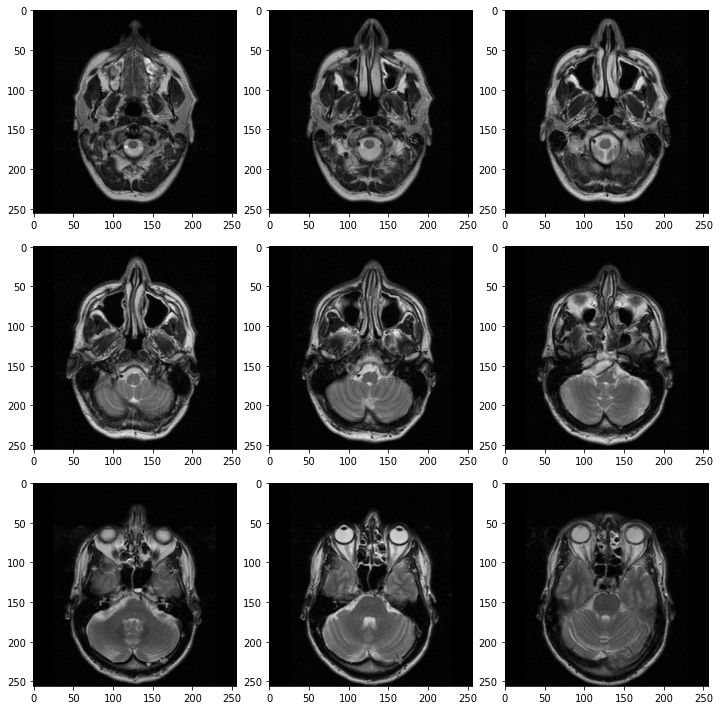

In [15]:
fig , axis = plt.subplots(3,3,figsize = (10,10))

axis = axis.ravel()
slice_counter = 0

for i in range(len(axis)):

    axis[i].imshow(full_volume[slice_counter], cmap = "gray")
    slice_counter+=1

plt.tight_layout()
plt.show()

# SimpleITK

In [16]:
%%capture
!pip install SimpleITK
import SimpleITK as sitk

In [17]:
path_to_head_mri = Path("/content/03-Data-Formats/SE000001")

series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [18]:
series_ids[0]

'1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702'

In [19]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
series_file_names # Notice How The Files Are Already Ordered

('/content/03-Data-Formats/SE000001/MR000000',
 '/content/03-Data-Formats/SE000001/MR000001',
 '/content/03-Data-Formats/SE000001/MR000002',
 '/content/03-Data-Formats/SE000001/MR000003',
 '/content/03-Data-Formats/SE000001/MR000004',
 '/content/03-Data-Formats/SE000001/MR000005',
 '/content/03-Data-Formats/SE000001/MR000006',
 '/content/03-Data-Formats/SE000001/MR000007',
 '/content/03-Data-Formats/SE000001/MR000008',
 '/content/03-Data-Formats/SE000001/MR000009',
 '/content/03-Data-Formats/SE000001/MR000010',
 '/content/03-Data-Formats/SE000001/MR000011',
 '/content/03-Data-Formats/SE000001/MR000012',
 '/content/03-Data-Formats/SE000001/MR000013',
 '/content/03-Data-Formats/SE000001/MR000014',
 '/content/03-Data-Formats/SE000001/MR000015',
 '/content/03-Data-Formats/SE000001/MR000016',
 '/content/03-Data-Formats/SE000001/MR000017',
 '/content/03-Data-Formats/SE000001/MR000018',
 '/content/03-Data-Formats/SE000001/MR000019',
 '/content/03-Data-Formats/SE000001/MR000020',
 '/content/03

In [20]:
path_to_head_mri = Path("/content/03-Data-Formats/SE000001")
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])

series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [21]:
image_data = series_reader.Execute()
print(image_data.GetSize())

(256, 256, 27)


In [22]:
head_mri = sitk.GetArrayFromImage(image_data)
print(type(head_mri))
print(head_mri.shape)

<class 'numpy.ndarray'>
(27, 256, 256)


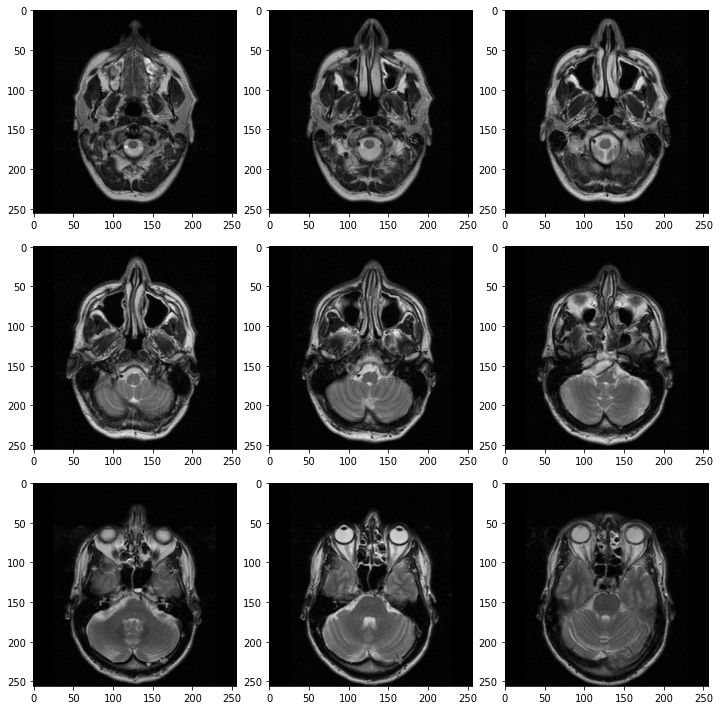

In [23]:
fig , axis = plt.subplots(3,3,figsize = (10,10))

axis = axis.ravel()
slice_counter = 0

for i in range(len(axis)):

    axis[i].imshow(head_mri[slice_counter], cmap = "gray")
    slice_counter+=1

plt.tight_layout()
plt.show()

---

In [24]:
%%capture
!pip install dicom2nifti
import dicom2nifti 
import nibabel as nib
from pathlib import Path

In [25]:
path_to_dicom = "/content/03-Data-Formats/SE000001"
dicom2nifti.convert_directory(path_to_dicom,".")

In [26]:
nifti = nib.load("/content/201_t2w_tse.nii.gz")
print(nifti)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine: 
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

In [27]:
nifti.header["qoffset_x"]

array(115.27232, dtype=float32)

In [28]:
nifti.affine.shape

(4, 4)

In [29]:
print(nifti.shape)
print()
print(nifti.header.get_data_shape())

(256, 256, 27)

(256, 256, 27)


In [30]:
image_array = nifti.get_fdata()

print(image_array.dtype)
print()
print(image_array.shape)

float64

(256, 256, 27)


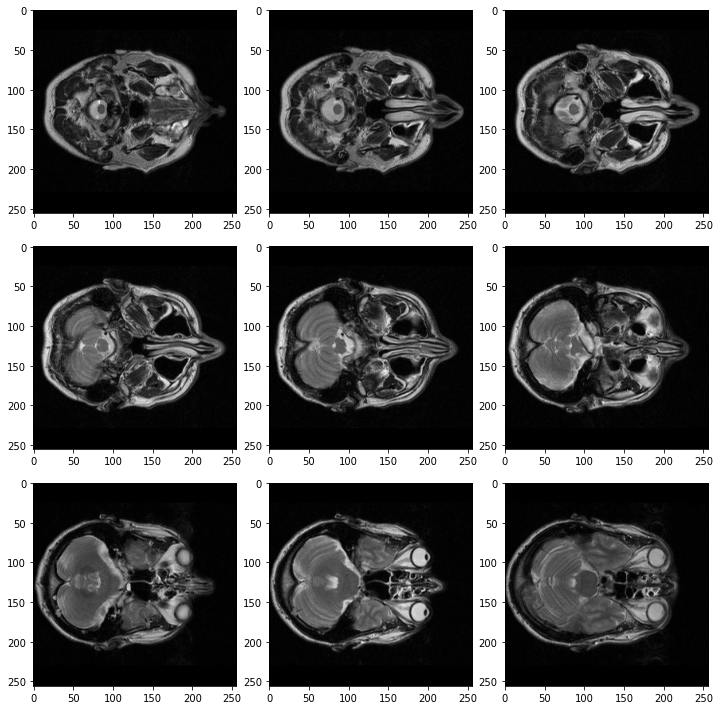

In [31]:
fig, axis = plt.subplots(3,3,figsize = (10,10))

axis = axis.ravel()
slice_counter = 0

for i in range(len(axis)):
    axis[i].imshow(image_array[:,:,slice_counter], cmap = "gray")
    slice_counter+=1
plt.tight_layout()
plt.show()

In [32]:
image_array.max(),image_array.min(),image_array.shape

(805.0, 0.0, (256, 256, 27))

In [33]:
image_array_processed = image_array * (image_array > 300)

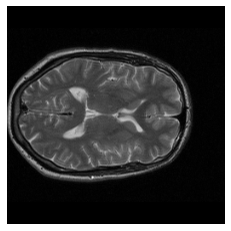

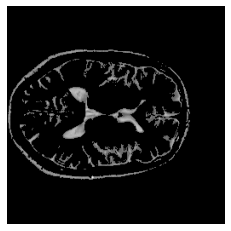

In [34]:
plt.imshow(image_array[:, :, 13],cmap = "gray")
plt.axis("off")
plt.show()

plt.imshow(image_array_processed[:, :, 13],cmap = "gray")
plt.axis("off")
plt.show()

In [35]:
processed_nifti = nib.Nifti1Image(image_array_processed, nifti.affine)
nib.save(processed_nifti,'201_t2w_tse_processed.nii.gz')

----

In [36]:
import nibabel as nib

# Orientation

At first we load the T1-weighted brain mri and extract the volume:

In [37]:
brain_mri = nib.load("/content/03-Data-Formats/03-Preprocessing/IXI662-Guys-1120-T1.nii.gz")
brain_mri

In [38]:
brain_mri_data = brain_mri.get_fdata()

Then we extract its shape and affine matrix

In [39]:
shape = brain_mri.shape
affine = brain_mri.affine
print(affine)
print()
print(shape)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

(256, 256, 150)


In [40]:
affine.round()

array([[   0.,   -0.,    1.,  -91.],
       [  -1.,    0.,    0.,  103.],
       [   0.,    1.,    0., -115.],
       [   0.,    0.,    0.,    1.]])

In [82]:
affine.round()[:,3:]

array([[ -91.],
       [ 103.],
       [-115.],
       [   1.]])

The affine matrix describes the mapping from the pixel coordinates to the scanner (or world) coordinates: <br />
It is always a $4 \times 4$ matrix with the following scheme':

\begin{equation}\label{eq:appendrow}
  \left(\begin{array}{cccc}
    \color{red}{x_{1,1}}  & \color{red}{x_{1,2}}  & \color{red}{x_{1,3}} & \color{blue}{x_{1,4}} \\
    \color{red}{x_{2,1}}  & \color{red}{x_{2,2}}  & \color{red}{x_{2,3}} & \color{blue}{x_{1,4}} \\
    \color{red}{x_{3,1}}  & \color{red}{x_{3,2}}  & \color{red}{x_{3,3}} & \color{blue}{x_{1,4}} \\
    \color{red}{0}  & \color{red}{0}  & \color{red}{0} & \color{blue}{1} \\
  \end{array}\right)
\end{equation}

The $\color{red}{\text{red}}$, $3\times 3$ sub-matrix is responsible for rotation, scaling and shearing the coordinates.
Feel free to take a look at how a rotation, scaling, translation or shearing looks like: https://en.wikipedia.org/wiki/Affine_transformation#Image_transformation. The affine matrix is simply a combination of those

The $\color{blue}{\text{blue}}$ vector is responsible for the translation or the offset.

The last row and column of the matrix is added for convenience, because it allows us to directly compute the transformation between the coordinate system in a single step instead of 2.




In [41]:
print(brain_mri.header.get_zooms())

(0.9375, 0.9375, 1.2000039)


You can slice through the volume in all orientations: axial, coronal and sagittal.<br />
**NOTE: Depending on the orientation of the scan, the indices change**<br />
Sometimes the first axis slices axial, sometimes coronal and sometimes sagittal.

You can find out the orientation by using **nib.aff2axcodes(affine)**
Remember the anatomical orientation from the medical introduction

In [42]:
nib.aff2axcodes(affine)

('P', 'S', 'R')

In this case, the orientation of the scan is:
* **from anterior to posterior (from front to back)**
* **from inferior to superior (from bottom to top)**
* **from left to right**

The letters returned from aff2axcodes always indicate the end of the corresponding axis.

This also explains why the scan is upside down, when slicing along the fist axis (coronal). As the second axis moves from the bottom to the top, the first slice is not the top of the head, but some part of the neck.

Let's slice through all orientations to get a feeling for it:

At first we move along the first axis (anterior to posterior). This moves through the head from the face to the back of the head.

**Coronal View**

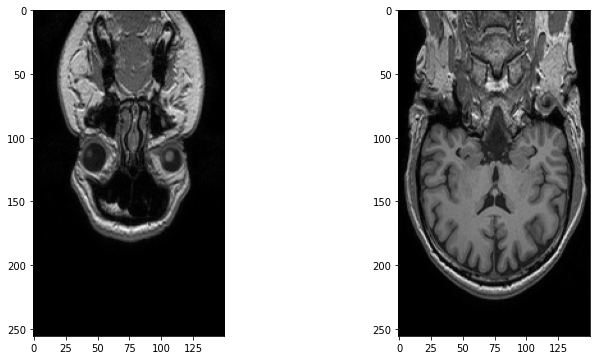

In [43]:
fig , axis = plt.subplots(1,2,figsize = (12,6))

axis[0].imshow(brain_mri_data[40, : , :], cmap = "gray")
axis[1].imshow(brain_mri_data[120, :, :], cmap = "gray")
plt.show()

Next we slice along the second axis which moves from the lower jaw/ neck to the top of the head. <br />
**Axial view**

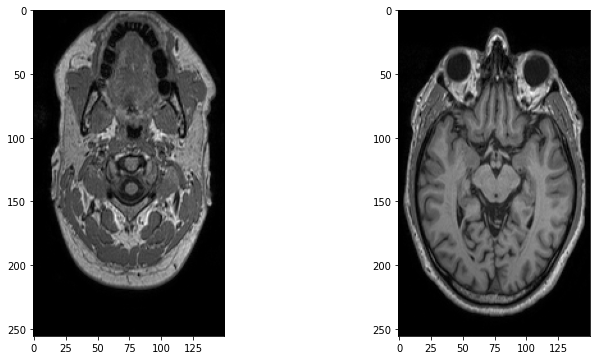

In [44]:
fig , axis = plt.subplots(1,2,figsize = (12,6))
axis[0].imshow(brain_mri_data[:, 40, :], cmap="gray")
axis[1].imshow(brain_mri_data[:, 120, :], cmap="gray")
plt.show()

And finally we slice through the third axis which moves from the right ear to the left ear.

**Sagital view**

Please take a moment and think about why the head is rotated.

The reason is that, on the first axis of this slice (y axis in the figure) we move from front to back. If we swap the two axis then the plot would look as we'd imagine it to look like (but again upside down, because we slice from bottom to top)

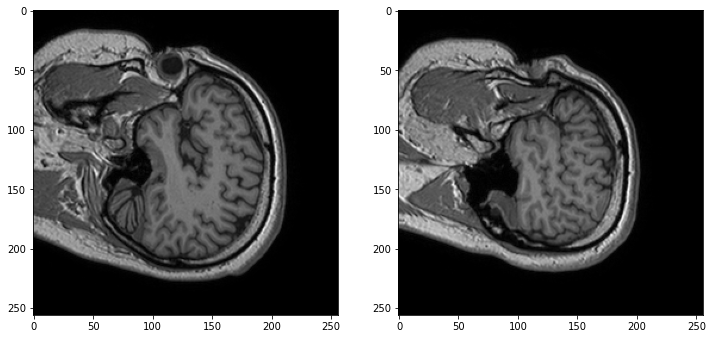

In [45]:
fig , axis = plt.subplots(1,2,figsize = (12,6))
axis[0].imshow(brain_mri_data[:, :, 40], cmap="gray")
axis[1].imshow(brain_mri_data[:, :, 120], cmap="gray")
plt.show()

You can use np.flip(arr, axis) to flip the axis and thus changes the orientation to top->bottom.

**CAUTION: This does not change the affine matrix and must only be used for validation purposes**

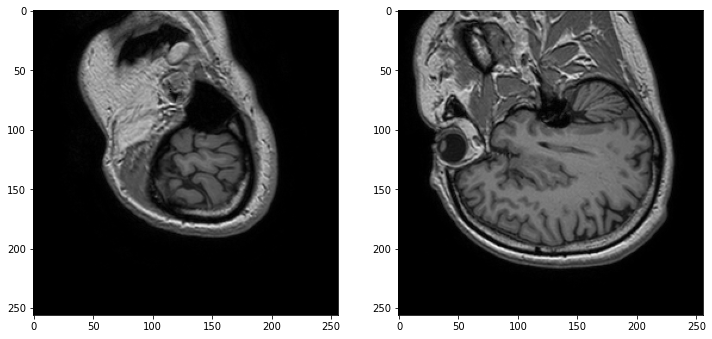

In [46]:
fig , axis = plt.subplots(1,2,figsize = (12,6))

brain_mri_swapped = np.swapaxes(brain_mri_data, 0, 1)
axis[0].imshow(brain_mri_swapped[:, :, 20], cmap="gray")
axis[1].imshow(brain_mri_swapped[:, :, 45], cmap="gray")
plt.show()

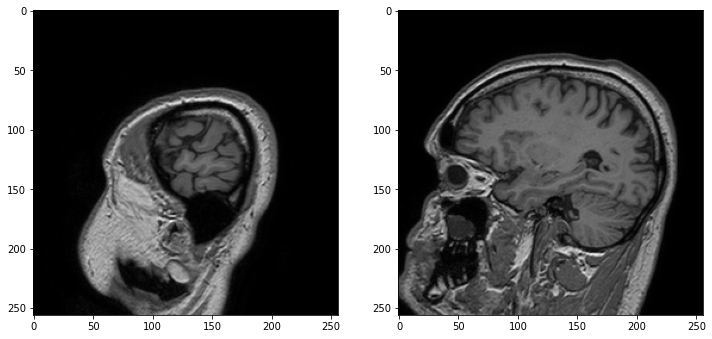

In [47]:
fig , axis = plt.subplots(1,2,figsize = (12,6))

axis[0].imshow(np.flip(brain_mri_swapped, 0)[:, :, 20], cmap="gray")
axis[1].imshow(np.flip(brain_mri_swapped, 0)[:, :, 100], cmap="gray");

----

In [48]:
affine.round()

array([[   0.,   -0.,    1.,  -91.],
       [  -1.,    0.,    0.,  103.],
       [   0.,    1.,    0., -115.],
       [   0.,    0.,    0.,    1.]])

In [49]:
voxel_coord = np.array((0,0,0,1))
physical_coord0 = affine @ voxel_coord
print(physical_coord0)

[ -90.67985535  102.82944489 -114.82378387    1.        ]


In [50]:
voxel_coord_manual = np.array((0, 0, 0))
physical_coord_manual = affine[:3, :3] @ voxel_coord_manual
physical_coord_manual = physical_coord_manual + affine[:3,3]
print(physical_coord_manual)

[ -90.67985535  102.82944489 -114.82378387]


In [51]:
voxel_coords = (np.linalg.inv(affine) @ physical_coord0).round()
print(voxel_coords)

[-0.  0.  0.  1.]


# Excursion: Reorientation

In [52]:
brain_mri_canonical = nib.as_closest_canonical(brain_mri)
brain_mri_canonical_data = brain_mri_canonical.get_fdata()

In [53]:
canonical_affine = brain_mri_canonical.affine
print(affine.round())
print(nib.aff2axcodes(affine))
print("****")
print(canonical_affine.round())
print(nib.aff2axcodes(canonical_affine))

[[   0.   -0.    1.  -91.]
 [  -1.    0.    0.  103.]
 [   0.    1.    0. -115.]
 [   0.    0.    0.    1.]]
('P', 'S', 'R')
****
[[   1.   -0.   -0.  -86.]
 [   0.    1.    0. -134.]
 [   0.   -0.    1.  -81.]
 [   0.    0.    0.    1.]]
('R', 'A', 'S')


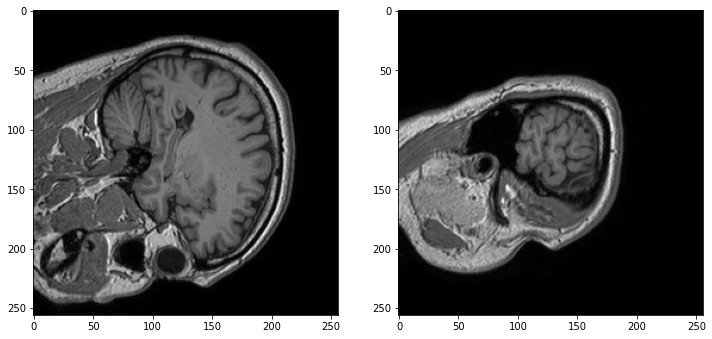

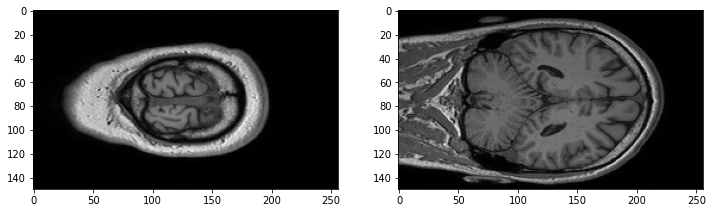

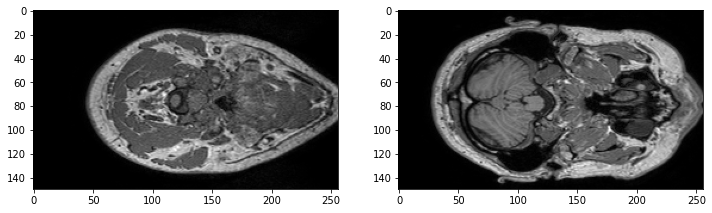

In [54]:
fig, axis = plt.subplots(1, 2,figsize = (12,10))
axis[0].imshow(brain_mri_canonical_data[50, :, :], cmap="gray")
axis[1].imshow(brain_mri_canonical_data[130, :, :], cmap="gray")
plt.show()

fig, axis = plt.subplots(1, 2,figsize = (12,10))
axis[0].imshow(brain_mri_canonical_data[:, 40, :], cmap="gray")
axis[1].imshow(brain_mri_canonical_data[:, 90, :], cmap="gray")
plt.show()

fig, axis = plt.subplots(1, 2,figsize = (12,10))
axis[0].imshow(brain_mri_canonical_data[:, :, 5], cmap="gray")
axis[1].imshow(brain_mri_canonical_data[:, :, 70], cmap="gray")
plt.show()

# Resampling

You might also want to change the size of your scan as it might be too large for your system.
However, resizing a volume is not as easy as resizing an image because the voxel size needs to be changed.

Let's resize our brain mri from (256, 256, 150) to (128, 128, 100)

In [55]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())
print(nib.aff2axcodes(affine))

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)
('P', 'S', 'R')


To do so, you can use **conform(input, desired_shape, voxel_size)** from nibabel.processing which resamples the image to the desired shape. Note that you have to change the voxel size as otherwise it would become impossible to reduce the size! Let's simply use a voxel size of  (2×2×2)(2×2×2) mm

In [56]:
%%capture 
!pip install nibabel -U

In [57]:
import nibabel.processing

In [58]:
voxel_size = (2,2,2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128, 128, 100), voxel_size, orientation="PSR")
brain_mri_resized_data = brain_mri_resized.get_fdata()

In [59]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())
print("-----")
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)
-----
(128, 128, 100)
(2.0, 2.0, 2.0)


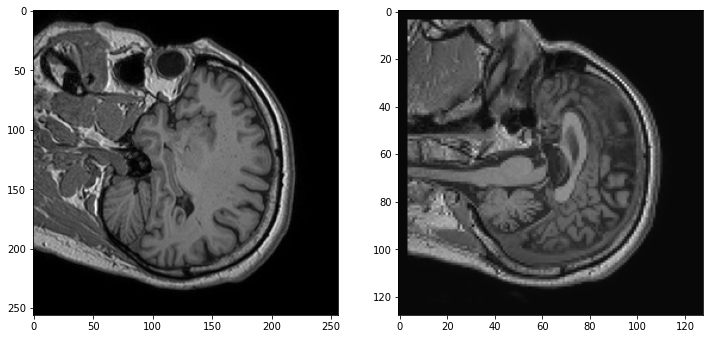

In [61]:
IDX = 50
fig, axis = plt.subplots(1, 2 ,figsize = (12,8))
axis[0].imshow(brain_mri_data[:,:,IDX], cmap="gray")
axis[1].imshow(brain_mri_resized_data[:,:,IDX], cmap="gray")
plt.show()

# Normalization and Standardization

## CT

As CTs have a fixed scale from -1000 (air) to 1000 (water) (This is called Houndsfield unit) you normally do not perform normalization to keep those scales.

In practice, you can assume that the values are between -1024 and 3071.

Thus you can standardize the data by dividing the volume by 3071.

To demonstrate this, we will load the CT of a subject contained in the medical segmentation decathlon lung tumor segmentation challenge (http://medicaldecathlon.com/, https://arxiv.org/abs/1902.09063) - a dataset which you will also use during this course.
The file is already provided in this directory (License: CC BY-SA 4.0, https://creativecommons.org/licenses/by-sa/4.0/)

In [62]:
lung_ct = nib.load("/content/03-Data-Formats/03-Preprocessing/lung_043.nii.gz")
lung_ct_data = lung_ct.get_fdata()

In [68]:
print(lung_ct.shape)
print()
print(lung_ct.affine.round())
print()
print(nib.aff2axcodes(lung_ct.affine))

(512, 512, 129)

[[  -1.    0.    0.  193.]
 [   0.    1.    0. -204.]
 [   0.    0.    2. -306.]
 [   0.    0.    0.    1.]]

('L', 'A', 'S')


In [70]:
lung_ct_data.max(),lung_ct_data.min()

(1954.0, -1024.0)

In [69]:
lung_ct_data_standardized = lung_ct_data / 3071

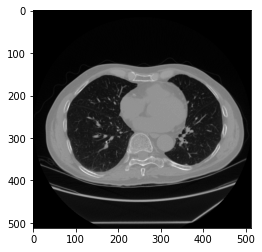

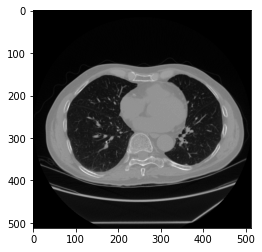

In [72]:
plt.figure()
plt.imshow(np.rot90(lung_ct_data_standardized[:,:,50]), cmap="gray")
plt.figure()
plt.imshow(np.rot90(lung_ct_data[:,:,50]), cmap="gray");

# Windowing

Depending on the task you perform you want to have a different contrast.
As an example, if you want to inspect the lung it is important to be able to view all small vessels.
In contrast, when examining the body it is important to have a high contrast, to be able to differentiate between different tissues.

This change in contrast is called windowing.
There are typically four different windows, a lung window, a bone window, a soft-tissue window and a brain window.
You can create such a window, by clipping all pixel values larger than a threshold.

Let's take a look at the lung- and the soft-tissue window.

To get a nice lung window, you can clip all values larger than -500 to -500. Note that this window completely denies us to take a look at the abdomen as everything looks identical.

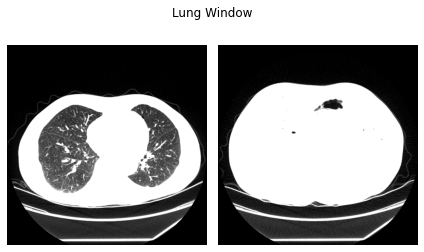

In [73]:
lung_ct_lung_window = np.clip(lung_ct_data, -1000, -500)

fig, axis = plt.subplots(1, 2)
axis[0].imshow(np.rot90(lung_ct_lung_window[:,:,50]), cmap="gray")
axis[1].imshow(np.rot90(lung_ct_lung_window[:,:,5]), cmap="gray")
axis[0].axis("off")
axis[1].axis("off")
fig.suptitle("Lung Window")
plt.tight_layout()
plt.savefig("lung_window.png", bbox_inches="tight")


To get a nice soft-tissue window, you can clip all values in bweteen -250 and 250. Here the lung ist almost black but you have a nice image of the abdomen.

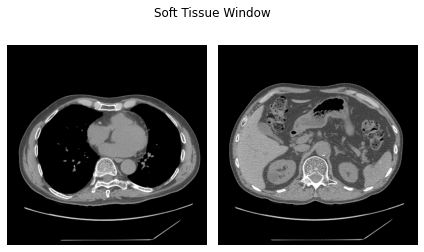

In [74]:
lung_ct_soft_tissue_window = np.clip(lung_ct_data, -250, 250)

fig, axis = plt.subplots(1, 2)
axis[0].imshow(np.rot90(lung_ct_soft_tissue_window[:,:,50]), cmap="gray")
axis[1].imshow(np.rot90(lung_ct_soft_tissue_window[:,:,5]), cmap="gray")

axis[0].axis("off")
axis[1].axis("off")
fig.suptitle("Soft Tissue Window")
plt.tight_layout()
plt.savefig("tissue_window.png", bbox_inches="tight")


# MRI

In contrast to CTs MRI images do not have an absolute, fixed scale and each patient varies.

Thus you can z-normalize the scans in a patient-wise manner.

$$ X_{\text{norm}} = \frac{X - \mu}{\sigma}$$

Additionally you can perform min-max scaling.
$$X_{\text{standardized}} = \frac{X - min(X)}{max(X)-min(X)} $$

To demonstrate this, we will use a cardiac MRI from the medical segmentation decathlon atrium segmentation task. (Same links as for the CT)


In [79]:
cardiac_mri = nib.load("/content/03-Data-Formats/03-Preprocessing/la_003.nii.gz")
cardiac_mri_data = cardiac_mri.get_fdata()

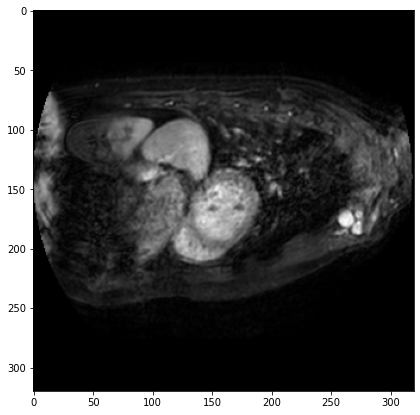

In [80]:
mean, std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)
cardiac_mri_norm = (cardiac_mri_data - mean) / std
cardiac_mri_standardized = (cardiac_mri_norm - np.min(cardiac_mri_norm)) / (np.max(cardiac_mri_norm) - np.min(cardiac_mri_norm))

plt.figure(figsize = (7,7))
plt.imshow(cardiac_mri_standardized[:,:,30], cmap="gray")
plt.show()

In [81]:
cardiac_mri_standardized.min(),cardiac_mri_standardized.max(),cardiac_mri_standardized.shape

(0.0, 1.0, (320, 320, 130))

Typically there is no windowing in MRI scans.

Those two normalization techniques should fit for most of the tasks. Note that there exist some more specific techniques such as White-Matter normalization for brain MRIs or Bias-Field Correction for slightly corrupted MR images.